# Проект: Исследование стартапов

Автор Богатырева Вика

Дата 17.02.25

# Содержание

[Введение](#1)<br>
[Шаг 1. Знакомство с данными: загрузка и первичная предобработка](#2)<br>
  [1.1. Вывод общей информации, исправление названия столбцов ](#3)<br>
  [1.2. Смена типов и анализ пропусков](#4)<br>
[Шаг 2. Предобработка данных, предварительное исследование](#5)<br>
  [2.1. Раунды финансирования по годам](#6)<br>
  [2.2. Люди и их образование](#7)<br>
  [2.3. Объединять или не объединять — вот в чём вопрос ](#8)<br>
  [2.4. Проблемный датасет и причина возникновения пропусков ](#9)<br>
[Шаг 3. Исследовательский анализ объединённых таблиц](#10)<br>
  [3.1. Объединение данных](#11)<br>
  [3.2. Анализ выбросов](#12)<br>
  [3.3. Куплены забесплатно?](#13)<br>
  [3.4. Цены стартапов по категориям ](#14)<br>
  [3.5. Сколько раундов продержится стартап перед покупкой](#15)<br>
[Шаг 4. Итоговый вывод и рекомендации](#16)<br>

# Введение
<a id="1"></a>

**Знакомство с проектом**

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

Исследование на этом наборе датасетов уже пытались проводить внутренними силами, но собственных аналитиков у компании нет и для решения задачи пригласили аутсорс-специалистов. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

# Шаг 1. Знакомство с данными: загрузка и первичная предобработка

<a id="2"></a>

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv


# 1.1. Вывод общей информации, исправление названия столбцов 

<a id="3"></a>

In [1]:
!pip install phik


In [2]:
# Импортируем библиотеки
import pandas as pd

from scipy.stats import median_abs_deviation

# Глобально изменить настройки вывода, чтобы отображать все строки
pd.set_option('display.max_rows', None)

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
# from phik import phik_matrix

plt.style.use('ggplot')


* Загрузите все данные по проекту.

In [3]:
# Выгружаем данные в переменные
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')


* Проверьте названия столбцов.

In [4]:
# проверяю названия столбцов
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [5]:
# изменю id на id_buy
acquisition_df.rename(columns={'id': 'id_buy'}, inplace=True)

In [6]:
acquisition_df.columns

Index(['id_buy', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [7]:
acquisition_df.head()

,id_buy,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [8]:
# тут надо заменить пробелы на _
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [9]:
# заменила пропуски на _
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_')

In [10]:
# меняю company_ID на company_id_1 т к есть еще столбец company_id
company_and_rounds_df.rename(columns={'company_ID': 'company_id_1'}, inplace=True)

In [11]:
# проверяю, теперь у меня 2 company_id_1 и company_id
company_and_rounds_df.columns

Index(['company_id_1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [12]:
# вывела 200 строк и посмотрела на значения двух столбцов
# в company_id_1 полные данные, а в company_id эти же данные, но с пропусками
company_and_rounds_df[['company_id_1', 'company_id']].head()

,company_id_1,company_id
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,10.0,NaN
4,100.0,NaN


In [13]:
# изменю название столбца name на name_company
company_and_rounds_df.rename(columns={'name': 'name_company'}, inplace=True)

In [14]:
# проверяю
company_and_rounds_df.columns

Index(['company_id_1', 'name_company', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [15]:
# проверяю названия столбцов, все ок
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [16]:
# проверяю названия столбцов, все ок
education_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [17]:
# изменю название столбца id на id_educat
education_df.rename(columns={'id': 'id_educat'}, inplace=True)

In [18]:
# проверяю
education_df.columns

Index(['id_educat', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [19]:
# проверяю названия столбцов
fund_df.columns

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [20]:
# изменю название столбца id на id_fund
fund_df.rename(columns={'id': 'id_fund'}, inplace=True)

In [21]:
# проверяю
fund_df.columns

Index(['id_fund', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [22]:
# проверяю названия столбцов
investment_df.columns

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

In [23]:
# изменю название столбца id на id_people
investment_df.rename(columns={'id': 'id_people'}, inplace=True)

In [24]:
# проверяю
investment_df.columns

Index(['id_people', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

In [25]:
# проверяю названия столбцов
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [26]:
# изменю название столбца id на id_people
people_df.rename(columns={'id': 'id_people'}, inplace=True)

In [27]:
# проверяю
people_df.columns

Index(['id_people', 'first_name', 'last_name', 'company_id',
       'network_username'],
      dtype='object')


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Вот мои дф:

* acquisition_df
* company_and_rounds_df
* degrees_df
* education_df
* people_df
* fund_df
* investment_df

Посмотрю на кол-во пропусков

In [28]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_buy                9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [29]:
# в term_code много пропусков
acquisition_df.isna().sum()

id_buy                     0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [30]:
# доля пропусков в процентах
a = round((acquisition_df.isna().sum() / acquisition_df.shape[0]) * 100, 0)
a

id_buy                   0.0
acquiring_company_id     0.0
acquired_company_id      0.0
term_code               81.0
price_amount             0.0
acquired_at              0.0
dtype: float64

In [31]:
aaaa = acquisition_df.isna().mean() * 100
aaaa

id_buy                   0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

In [32]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id_1         217472 non-null  float64
 1   name_company         217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

In [33]:
company_and_rounds_df.isna().sum()

company_id_1              302
name_company              303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [34]:
# доля пропусков в процентах
b = round((company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]) * 100, 0)

In [35]:
company_and_rounds_df.head()

,company_id_1,name_company,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [37]:
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11221
subject        28312
dtype: int64

In [38]:
# доля пропусков в процентах
c = round((degrees_df.isna().sum() / degrees_df.shape[0]) * 100, 0)

In [39]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_educat     109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [40]:
education_df.isna().sum()

id_educat           0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [41]:
# доля пропусков в процентах
d = round((education_df.isna().sum() / education_df.shape[0]) * 100, 0)

In [42]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_people         226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [43]:
people_df.isna().sum()

id_people                0
first_name               9
last_name                4
company_id          192094
network_username    187842
dtype: int64

In [44]:
# доля пропусков в процентах
e = round((people_df.isna().sum() / people_df.shape[0]) * 100, 0)

In [45]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_fund             11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [46]:
fund_df.isna().sum()

id_fund                  0
name                     3
founded_at            7047
domain                4290
network_username      9503
country_code          4599
investment_rounds        0
invested_companies       0
milestones               0
dtype: int64

In [47]:
# доля пропусков в процентах
f = round((fund_df.isna().sum() / fund_df.shape[0]) * 100, 0)

In [48]:
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id_people         61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [49]:
# тут нет пропусков
investment_df.isna().sum()

id_people           0
funding_round_id    0
company_id          0
fund_id             0
dtype: int64

In [50]:
# доля пропусков в процентах
g = round((investment_df.isna().sum() / investment_df.shape[0]) * 100, 0)

In [51]:
# неудобно смотреть эти доли...попробую оъединить 7 серий с долями пропусков в 1 таблицу

list_of_s = pd.DataFrame({
    'acquisition_df': a,
    'company_and_rounds_df': b,
    'degrees_df': c,
    'education_df': d,
    'people_df': e,
    'fund_df': f,
    'investment_df': g
})

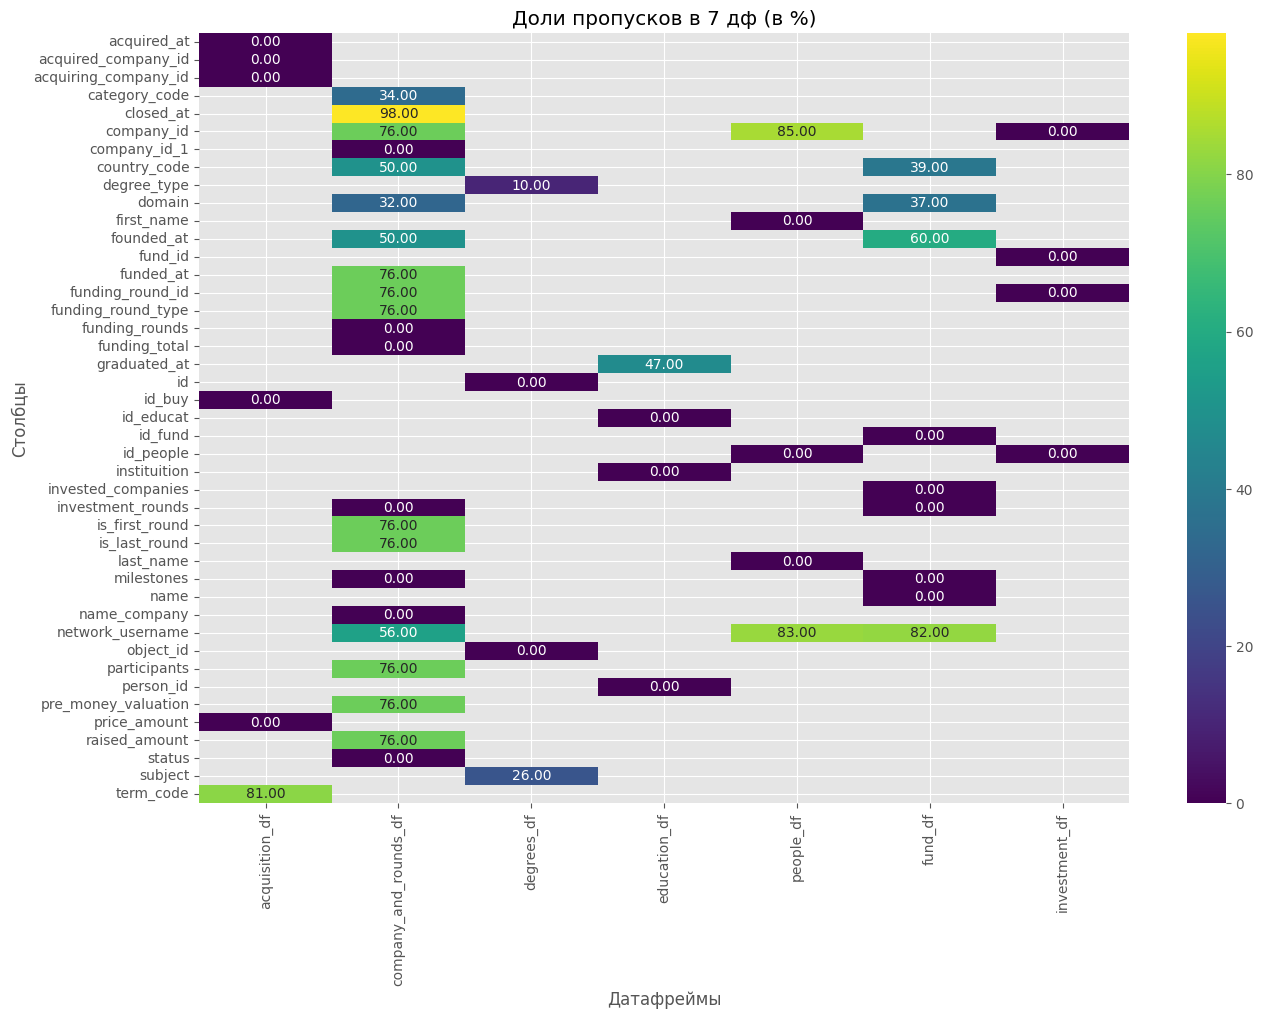

In [52]:
plt.figure(figsize=(15, 10))
sns.heatmap(list_of_s, annot=True, cmap='viridis', cbar=True, fmt='.2f')
plt.title('Доли пропусков в 7 дф (в %)')
plt.xlabel('Датафреймы')
plt.ylabel('Столбцы')
plt.show()

Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

**Вывод:** у многих столбцов повторяются названия в разных дф. Я уже заменила чатсь названий у столбцов id. Дальше, скорее всего, буду заменять еще. Одинаковые названия столбцов могут стать проблемрй при объединении дф, в них можно запутаться. 

На тепловой диаграмме выше видно большое кол-во долей пропусков в %. Дальше нужно определить подходящие для работы дф и столбцы, и обработать только приоритетные.

# 1.2. Смена типов и анализ пропусков 

<a id="4"></a>

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [53]:
# меняю тип данных столбца acquired_at на datetime
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])

In [54]:
# проверяю, все ок
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_buy                9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [55]:
# проверяю
acquisition_df.head()

,id_buy,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [56]:
# поменяю тип столбцов founded_at на datetime
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], errors='ignore')
# поменяю тип столбцов closed_at на datetime
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], errors='ignore')
# поменяю тип столбцов funded_at на datetime
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='ignore')

C:\Users\cools\AppData\Local\Temp\ipykernel_7268\3878005135.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], errors='ignore')
C:\Users\cools\AppData\Local\Temp\ipykernel_7268\3878005135.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], errors='ignore')
C:\Users\cools\AppData\Local\Temp\ipykernel_7268\3878005135.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='ig

In [57]:
company_and_rounds_df[['founded_at', 'closed_at', 'funded_at']].head()

,founded_at,closed_at,funded_at
0,2005-10-17,NaT,2005-10-01
1,2005-10-17,NaT,2007-01-01
2,2005-10-17,NaT,2008-05-19
3,NaT,NaT,NaT
4,NaT,NaT,NaT


In [58]:
# получилось поменять типы данных у столбцов founded_at, closed_at, funded_at
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_1         217472 non-null  float64       
 1   name_company         217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [59]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_educat     109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [60]:
# поменяю тип столбца graduated_at на datetime
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

In [61]:
# получилось
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_educat     109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [62]:
education_df.head()

,id_educat,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


In [63]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_fund             11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [64]:
# поменяю тип столбца graduated_at на datetime
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'], errors='coerce')

In [65]:
# получилось
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_fund             11652 non-null  int64         
 1   name                11649 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


In [66]:
fund_df.head()

,id_fund,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaT,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaT,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaT,NaN,NaN,NaN,0,0,1



* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

**Вывод:** в целом данных много, но также много пропусков. этом может повлиять на исходный результат исследования. ДФ company_and_rounds_df вызывает вопросы...там явно не хватает информации. 

# Шаг 2. Предобработка данных, предварительное исследование

<a id="5"></a>


# 2.1. Раунды финансирования по годам 

<a id="6"></a>

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [67]:
company_and_rounds_df.head()

,company_id_1,name_company,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# вывожу год в новый стобец
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year

In [69]:
# сводная таблицу по годам, в которой на основании столбца raised_amount
# для каждого года указан типичный размер средств, выделяемый в рамках одного раунда
# и общее количество раундов финансирования за этот год.

pivot_table = company_and_rounds_df.groupby('funded_year').agg(
    raised_amount_mean=('raised_amount', 'median'),
    count_rounds=('funding_rounds', 'count')
).reset_index()

pivot_table

,funded_year,raised_amount_mean,count_rounds
0,1960.0,0.0,9
1,1973.0,0.0,1
2,1974.0,0.0,2
3,1984.0,41000.0,3
4,1985.0,0.0,1
5,1987.0,1250000.0,2
6,1989.0,15000.0,1
7,1990.0,1000000.0,1
8,1992.0,2000000.0,1
9,1993.0,62500.0,2


In [70]:
pivot_table

,funded_year,raised_amount_mean,count_rounds
0,1960.0,0.0,9
1,1973.0,0.0,1
2,1974.0,0.0,2
3,1984.0,41000.0,3
4,1985.0,0.0,1
5,1987.0,1250000.0,2
6,1989.0,15000.0,1
7,1990.0,1000000.0,1
8,1992.0,2000000.0,1
9,1993.0,62500.0,2


In [71]:
# максимальное значение финансирования
max_item = pivot_table['raised_amount_mean'].max()
max_item

np.float64(6700000.0)

In [72]:
new_pivot_table = pivot_table[pivot_table['count_rounds'] > 50]
new_pivot_table

,funded_year,raised_amount_mean,count_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,95
18,2002.0,4200000.0,115
19,2003.0,3000000.0,154
20,2004.0,5000000.0,286
21,2005.0,5500000.0,1624
22,2006.0,5000000.0,2409
23,2007.0,3973320.0,3220
24,2008.0,3110000.0,3735


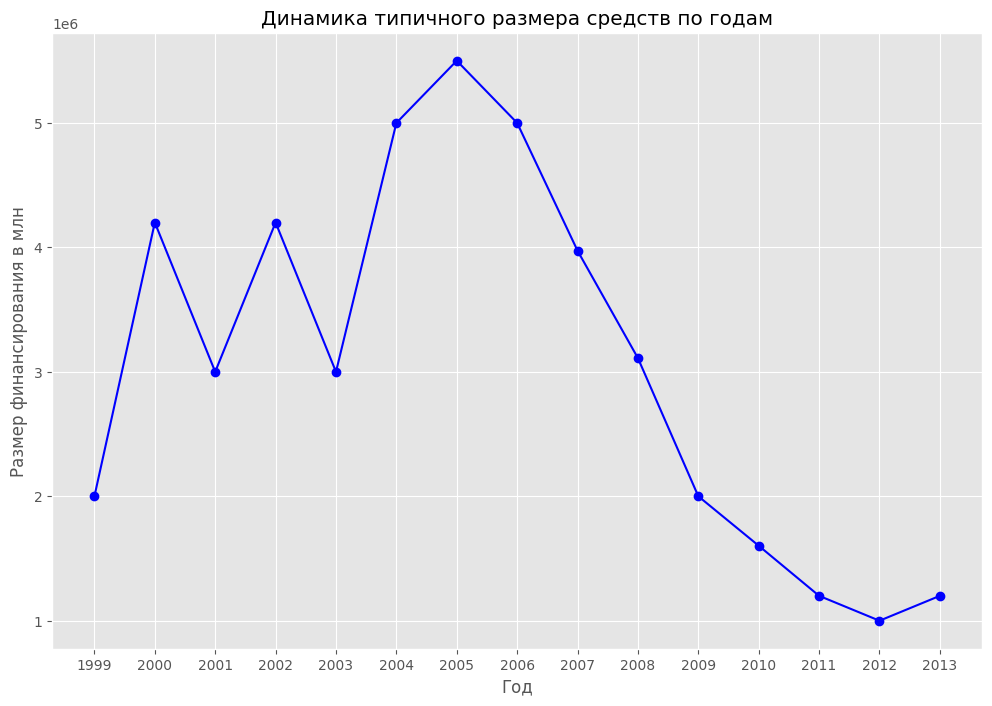

In [73]:
# вывод линейной диаграммы
plt.figure(figsize=(12, 8))
plt.plot(new_pivot_table['funded_year'], new_pivot_table['raised_amount_mean'], marker='o', color='b')
plt.title('Динамика типичного размера средств по годам')
plt.xlabel('Год')
plt.ylabel('Размер финансирования в млн')
plt.xticks(new_pivot_table['funded_year'])  # вывод всех лет на оси
# настройка формата отображения чисел (добавила настройку для вывода y)
# plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True)
plt.show()

In [74]:
# удаляю новый стобец funded_year, он пока нужен
company_and_rounds_df = company_and_rounds_df.drop(columns=['funded_year'])

In [75]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_1         217472 non-null  float64       
 1   name_company         217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

В сводной таблице видно, что типичный размер собранных в рамках одного раунда средств был максимален в 1994 году. Размер финансирования составил = 6700000.

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

В 2013 году кол-во раундов = 11042 (это максимальное кол-во раундов за исследуемый период). Типичный размер средств составил 1200000. Тенденция к росту раундов растет год от года, это видно на сводной таблице, а финансирование раундов падает.


# 2.2. Люди и их образование 

<a id="7"></a>

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [76]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_people         226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [77]:
people_df.head()

,id_people,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [78]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_educat     109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [79]:
education_df.head()

,id_educat,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


In [80]:
# объединила 2 дф, первым выбрала people_df
two_df_t = pd.merge(people_df, education_df, left_on='id_people', right_on='person_id', how='left')

In [81]:
two_df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int64         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_educat         109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.4+ MB


In [82]:
two_df_t.head()

,id_people,first_name,last_name,company_id,network_username,id_educat,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [83]:
# добавляю новый столбец, чтобы знать кол-во сотрудников в компании
two_df_t['count_emp'] = two_df_t.groupby('company_id')['id_people'].transform('count')

In [84]:
# Категоризирую группы компаний
bins = [0, 1, 2, 3, 10, 50, float('inf')]
# разделила компании примерно по количеству значений на глаз
# было оч много значений 1, 2,3, а остыльных меньше и меньше
labels = ['1 сотрудник', '2 сотрудника', '3 сотрудника', '4-10 сотрудников', '11-50 сотрудников', '51+ сотрудников']

two_df_t['categories_groups'] = pd.cut(two_df_t['count_emp'], bins, labels=labels)

In [85]:
# проверяю
two_df_t.head()

,id_people,first_name,last_name,company_id,network_username,id_educat,person_id,instituition,graduated_at,count_emp,categories_groups
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,84.0,51+ сотрудников
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,14.0,11-50 сотрудников
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,3.0,3 сотрудника
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,2.0,2 сотрудника
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [86]:
# считаю среднюю долю без инфы об образовании
# доля без информации = количество пропусков / количество всех строк

dolia = two_df_t.groupby('categories_groups').agg(
    # считаю общее кол-во сотрудников
    count_employee=('id_people', 'size'),  
    # считаю пропуски в id_educat
    miss_educate=('id_educat', lambda x: x.isna().sum())  
).reset_index()

# доля без информации в % = (количество пропусков / количество всех строк) * 100
dolia['miss_dolia'] = (dolia['miss_educate'] / dolia['count_employee']) * 100

display(dolia[['categories_groups', 'miss_dolia']])

C:\Users\cools\AppData\Local\Temp\ipykernel_7268\152915937.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dolia = two_df_t.groupby('categories_groups').agg(


,categories_groups,miss_dolia
0,1 сотрудник,59.229682
1,2 сотрудника,22.661035
2,3 сотрудника,22.742775
3,4-10 сотрудников,29.500191
4,11-50 сотрудников,27.693175
5,51+ сотрудников,18.283582


**Вывод**: чтобы посчитать кол-во сотрудников по компаниям, добавила столбец count_emp. Разделила сотрудников в categories_groups по частоте встречаемости, значения кол-ва сотрудников 1, 2, 3  встречались очень часто. До 10 сотрудников в компании это скорее всего стартап. От 11 до 50 сотрудников в мальньких компаниях и от 50 и выше в масштабируемых, больших компаниях. 

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу degrees.csv.

In [87]:
# попробую удалить 'p:' из object_id
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '', regex=False)

In [88]:
# меняю тип данных столбцу object_id на int
degrees_df['object_id'] = degrees_df['object_id'].astype('int64')

In [89]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  int64 
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [90]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_people         226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [91]:
# объединила education_df и degrees_df, также можно и по inner
two = pd.merge(education_df, degrees_df, left_on='person_id', right_on='object_id', how='left')

In [92]:
# в объединенном дф увеличилось кол-во строк в 2 раза (считаю, что это неправильное объединение) 
two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213172 entries, 0 to 213171
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_educat     213172 non-null  int64         
 1   person_id     213172 non-null  int64         
 2   instituition  213082 non-null  object        
 3   graduated_at  114615 non-null  datetime64[ns]
 4   id            213172 non-null  int64         
 5   object_id     213172 non-null  int64         
 6   degree_type   191607 non-null  object        
 7   subject       157183 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 13.0+ MB


In [93]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  int64 
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [94]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_people         226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [95]:
# попробую объединить people_df и degrees_df (при left кол-во строк увеличивается на 40к)
second = pd.merge(people_df, degrees_df, left_on='id_people', right_on='object_id', how='left')

In [96]:
second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_people         267694 non-null  int64  
 1   first_name        267685 non-null  object 
 2   last_name         267690 non-null  object 
 3   company_id        44789 non-null   float64
 4   network_username  50775 non-null   object 
 5   id                109056 non-null  float64
 6   object_id         109056 non-null  float64
 7   degree_type       97883 non-null   object 
 8   subject           80890 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 18.4+ MB


**Вывод**: Думаю, что не нужно присоединять дф degrees_df. Данных получается больше, происходит неккоректное присоединение. 

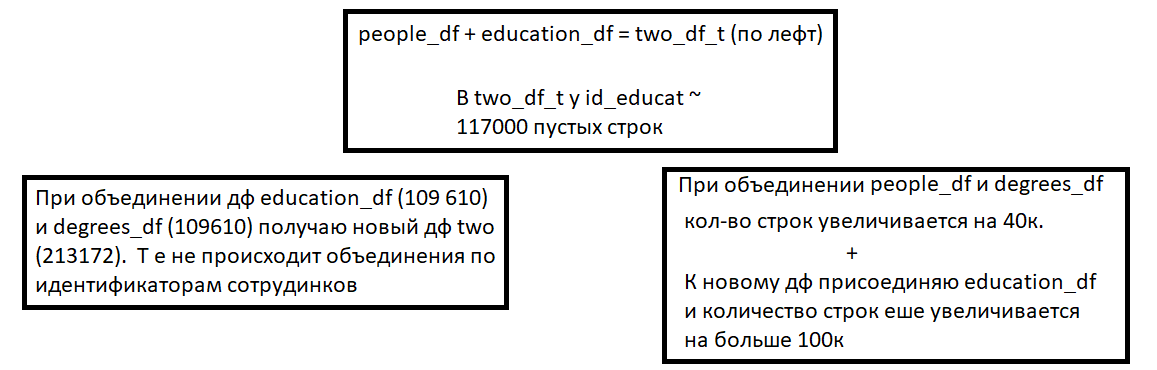

# 2.3. Объединять или не объединять — вот в чём вопрос 

<a id="8"></a>

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [97]:
# столбец network_username встречается в дф company_and_rounds_df и people_df
# считаю кол-во непустых ячеек в столбце
company_and_rounds_df['network_username'].count()

np.int64(95534)

In [98]:
# считаю кол-во непустых ячеек в столбце
people_df['network_username'].count()

np.int64(38867)

In [99]:
# считаю кол-во строк в дф
company_and_rounds_df.shape[0]

217774

In [100]:
# считаю кол-во строк в дф
people_df.shape[0]

226709

In [101]:
# считаю кол-во уникальных значений 
company_and_rounds_df['network_username'].nunique()

79571

In [102]:
# считаю кол-во уникальных значений 
people_df['network_username'].nunique()

38421

In [103]:
# попробую найти пересечения в двух столбцах

first = set(company_and_rounds_df['network_username'])
second = set(people_df['network_username'])
intersections = first.intersection(second)


In [104]:
len_in = len(intersections)
len_in

2200

**Вывод:**  
    
В company_and_rounds_df['network_username']:
1. всего кол-во строк 217774
2. кол-во непустых ячеек 95534 
3. количество уникальных значений 79571

В people_df['network_username']:
1. всего кол-во строк 226709
2. кол-во непустых ячеек 38867
3. количество уникальных значений 38421

Есть совпадающие данные в двух столбцах (2200, 1% совпадений). 


# 2.4. Проблемный датасет и причина возникновения пропусков 

<a id="9"></a>

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [105]:
company_and_rounds_df.head()

,company_id_1,name_company,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# считаю пропуски (всего строк 217774)
gg = company_and_rounds_df.isna().sum()

In [107]:
# считаю пропуски
jk = company_and_rounds_df.shape[0]

In [108]:
# доли проусков
prop_empties = (gg / jk) * 100
prop_empties

company_id_1            0.138676
name_company            0.139135
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

При изучении доли пропусков видно, что начиная от funding_round_id до is_last_round доля пропусков у столбцов практически одна и таже - 75%. А у столбцов от investment_rounds до milestones - одинаковая доля пропусков. 

Для удобства можно разделить таблицу на 2 части:
1. первая таблица будет со столбцами company_id_1 - milestones 
2. funding_round_id - is_last_round 

У столбца company_id очень много пропусков. Можно ли заменить столбец company_id на company_id_1...попробую проверить совподения в столбцах company_id, company_id_1. Если совпадений будет 25%, то можно сделать вывод что company_id и есть company_id_1. Чуда не случилось и проверить пересечение не удалось из-за большого кол-ва данных.

Еще думаю само название говорит за себя. Дф называется company_and_rounds. Как будто объединили информацию company и rounds по лефт (много пропусков именно в правой части т е во второй таблице)

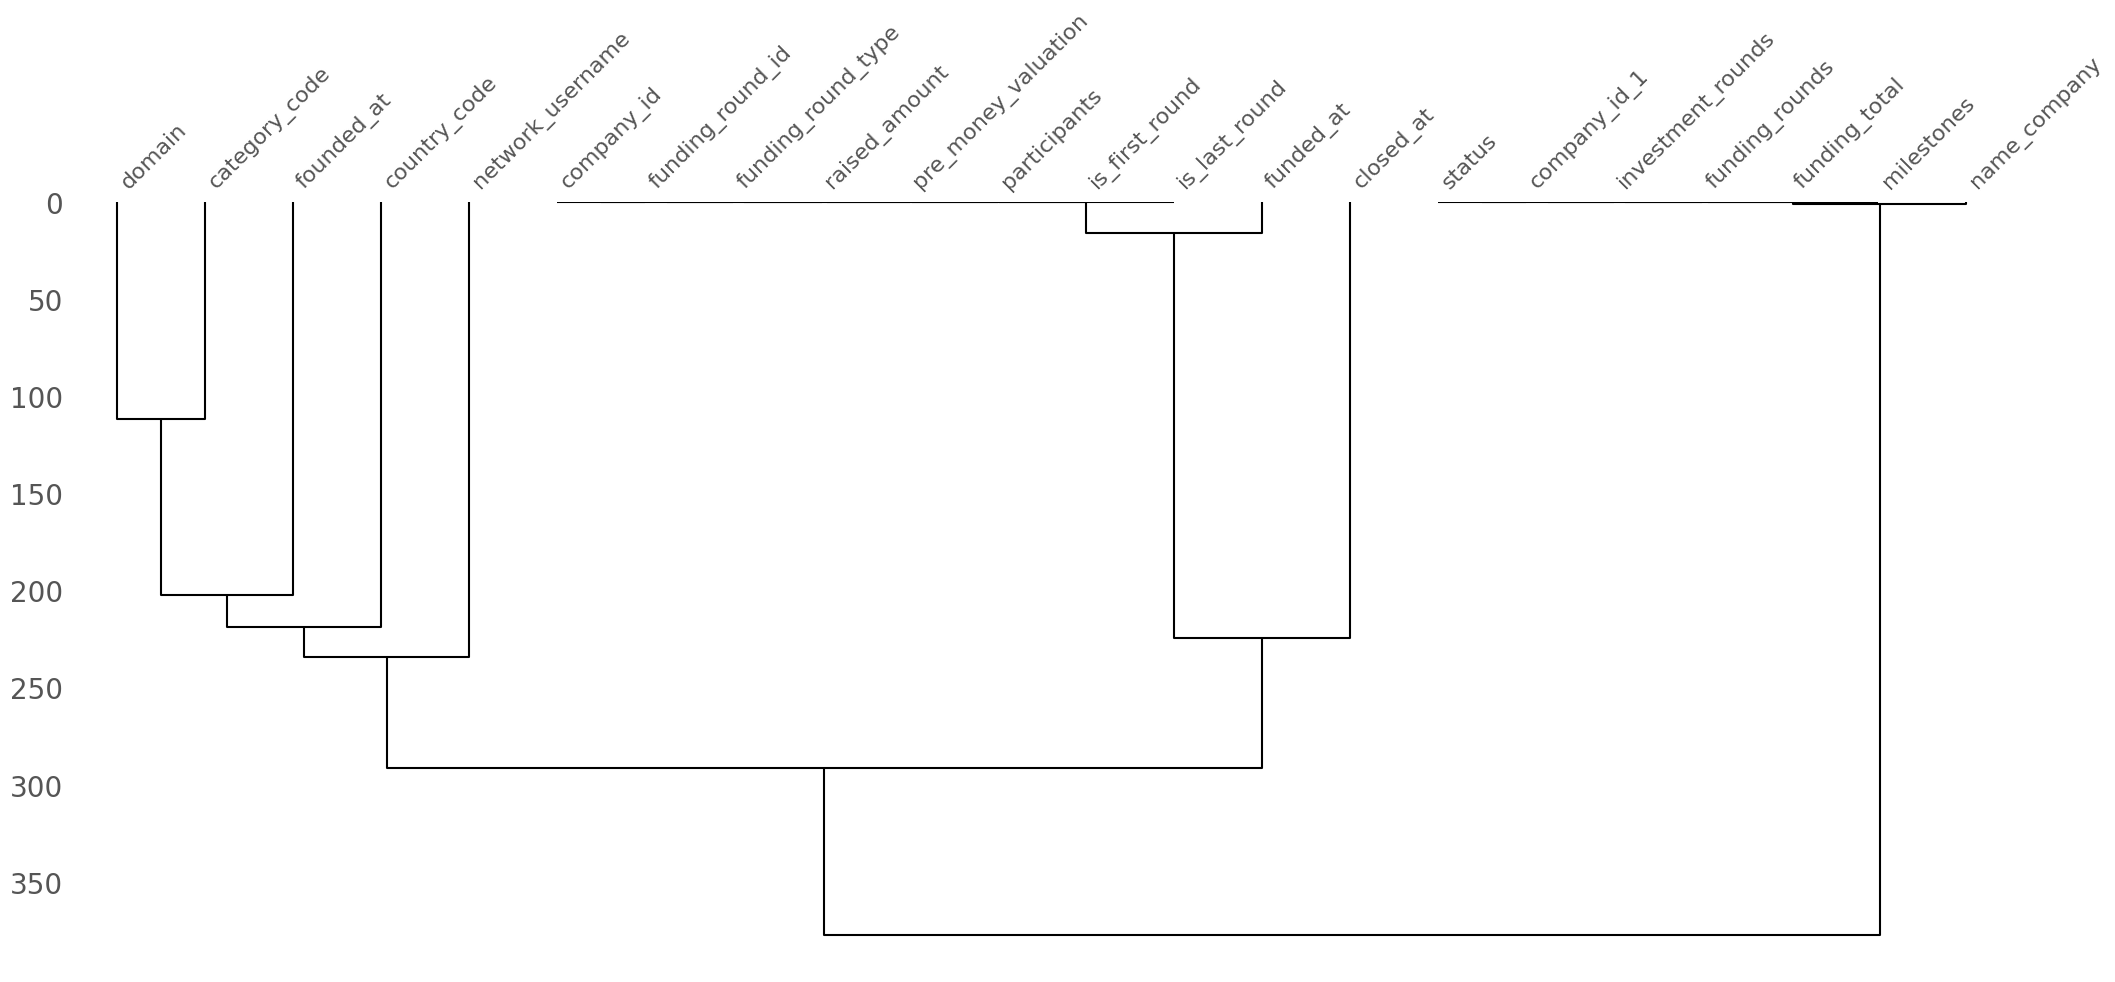

In [109]:
# Код пример ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(company_and_rounds_df)
plt.show()

In [110]:
# делаю копию дф
company_and_rounds_df_copy = company_and_rounds_df.copy()

In [111]:
# разделю дф company_and_rounds_df по столбцам на 2 дф

company_df = company_and_rounds_df_copy[['company_id_1', 'name_company', 
                                    'category_code', 'status', 
                                    'founded_at', 'closed_at',
                                    'domain', 'network_username', 'country_code',
                                    'investment_rounds', 'funding_rounds',
                                    'funding_total', 'milestones']]

# для rounds_df я не включаю столбец company_id, а сразу заменяю его на company_id_1
rounds_df = company_and_rounds_df_copy[['funding_round_id', 'company_id', 'funded_at',
                                   'funding_round_type', 'raised_amount', 'pre_money_valuation', 
                                   'participants', 'is_first_round', 'is_last_round']] 

**Обработаю таблицу company_df**

In [112]:
# есть повторяющиеся строки, некоторомы столбцам поменяю типы
company_df.head()

,company_id_1,name_company,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


In [113]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_1       217472 non-null  float64       
 1   name_company       217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [114]:
# тут удаляю inf и явно указываю что хочу изменить столбец в родительском дф 
company_df.loc[:, 'company_id_1'] = company_df['company_id_1'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'company_id_1'] = company_df['company_id_1'].astype('Int32')

C:\Users\cools\AppData\Local\Temp\ipykernel_7268\3585795007.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[     1,      1,      1,     10,    100,  10000,  10001,  10002,  10003,
 100042,
 ...
   <NA>,   <NA>,   <NA>,   <NA>,   <NA>,   <NA>,   <NA>,   <NA>,   <NA>,
   <NA>]
Length: 217774, dtype: Int32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  company_df.loc[:, 'company_id_1'] = company_df['company_id_1'].astype('Int32')


In [115]:
company_df.loc[:, 'investment_rounds'] = company_df['investment_rounds'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'investment_rounds'] = company_df['investment_rounds'].astype('Int32')

C:\Users\cools\AppData\Local\Temp\ipykernel_7268\627403747.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
 ...
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]
Length: 217774, dtype: Int32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  company_df.loc[:, 'investment_rounds'] = company_df['investment_rounds'].astype('Int32')


In [116]:
company_df.loc[:, 'funding_rounds'] = company_df['funding_rounds'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'funding_rounds'] = company_df['funding_rounds'].astype('Int32')

C:\Users\cools\AppData\Local\Temp\ipykernel_7268\122793430.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[   3,    3,    3,    0,    0,    0,    0,    0,    0,    0,
 ...
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]
Length: 217774, dtype: Int32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  company_df.loc[:, 'funding_rounds'] = company_df['funding_rounds'].astype('Int32')


In [117]:
company_df['funding_total'].unique()

array([3.9750e+07, 0.0000e+00, 5.0000e+06, ..., 3.7150e+04, 3.9441e+05,
              nan], shape=(9484,))

In [118]:
company_df.loc[:, 'funding_total'] = company_df['funding_total'].replace([np.inf, -np.inf], np.nan)

# удаляю строки с NA значениями
company_df.dropna(subset=['funding_total'], inplace=True)
company_df.loc[:, 'funding_total'] = company_df['funding_total'].astype('int64')

C:\Users\cools\AppData\Local\Temp\ipykernel_7268\2088340063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.dropna(subset=['funding_total'], inplace=True)


In [119]:
company_df.loc[:, 'milestones'] = company_df['milestones'].replace([np.inf, -np.inf], np.nan)
company_df.loc[:, 'milestones'] = company_df['milestones'].astype('Int32')

In [120]:
# инфо о дф до удаления дубликатов
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_1       217472 non-null  Int32         
 1   name_company       217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  Int32         
 10  funding_rounds     217472 non-null  Int32         
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: Int32(3), datetime64[ns](2), float64(2), objec

In [121]:
# есть повторяющиеся строки, некоторомы столбцам поменяю типы
company_df.head(1)

,company_id_1,name_company,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5.0


In [122]:
company_df.isna().mean() * 100

company_id_1          0.000000
name_company          0.000460
category_code        33.837000
status                0.000000
founded_at           49.439008
closed_at            98.414049
domain               32.331978
network_username     56.070667
country_code         50.059318
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

In [123]:
# удаляю дубликаты и записываю дф company_df в company_df_empty
company_df_empty = company_df.drop_duplicates()

In [124]:
company_df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_1       196553 non-null  Int32         
 1   name_company       196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  Int32         
 10  funding_rounds     196553 non-null  Int32         
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: Int32(3), datetime64[ns](2), float64(2), objec

In [125]:
# удалю пустые строки 
company_df_empty = company_df.dropna(how='all')

In [126]:
# вывожу доли пропусков
company_df_empty.isna().mean() * 100

company_id_1          0.000000
name_company          0.000460
category_code        33.837000
status                0.000000
founded_at           49.439008
closed_at            98.414049
domain               32.331978
network_username     56.070667
country_code         50.059318
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

**Теперь обработаю таблицу rounds_df**

In [127]:
rounds_df.head(10)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
company_df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_1       217472 non-null  Int32         
 1   name_company       217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  Int32         
 10  funding_rounds     217472 non-null  Int32         
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: Int32(3), datetime64[ns](2), float64(2), objec

In [129]:
# предобработка данных в rounds_df
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


In [130]:
# вывожу доли пропусков
rounds_df.isna().mean() * 100

funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

Меня смущает большое кол-во пропусков во всех столбцах. В учебнике практикума было сказано, что не рекомендуют удалять пропуски, где больше 5%. Но тут у всех столбцов почти одинаковый процент пропусков. Думаю 2 таблицы присоединили по full join и так появилось много дубликатов, и много пропусков.

In [131]:
# удалю пустые строки 
rounds_df_empty = rounds_df.dropna(how='all')

In [132]:
# удаляю дубликаты
rounds_df_empty = rounds_df_empty.drop_duplicates()

In [133]:
rounds_df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB


In [134]:
# вроде все четко
rounds_df_empty.isna().mean() * 100

funding_round_id       0.000000
company_id             0.000000
funded_at              0.468561
funding_round_type     0.000000
raised_amount          0.000000
pre_money_valuation    0.000000
participants           0.000000
is_first_round         0.000000
is_last_round          0.000000
dtype: float64

In [135]:
rounds_df_empty.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
20,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0


In [136]:
# меняю тип данных 
rounds_df_empty['funding_round_id'] = rounds_df_empty['funding_round_id'].astype('int32')

In [137]:
# меняю тип данных 
rounds_df_empty['company_id'] = rounds_df_empty['company_id'].replace([np.inf, -np.inf], np.nan)
rounds_df_empty['company_id'] = rounds_df_empty['company_id'].astype('int32')

In [138]:
rounds_df_empty['raised_amount'] = rounds_df_empty['raised_amount'].astype('int64')
rounds_df_empty['pre_money_valuation'] = rounds_df_empty['pre_money_valuation'].astype('int64')
rounds_df_empty['participants'] = rounds_df_empty['participants'].astype('int16')
rounds_df_empty['is_first_round'] = rounds_df_empty['is_first_round'].astype('int16')
rounds_df_empty['is_last_round'] = rounds_df_empty['is_last_round'].astype('int16')

In [139]:
rounds_df_empty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  int32         
 1   company_id           52928 non-null  int32         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  int64         
 5   pre_money_valuation  52928 non-null  int64         
 6   participants         52928 non-null  int16         
 7   is_first_round       52928 non-null  int16         
 8   is_last_round        52928 non-null  int16         
dtypes: datetime64[ns](1), int16(3), int32(2), int64(2), object(1)
memory usage: 2.7+ MB


In [140]:
rounds_df_empty.head(15)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888,1,2005-10-01,series-a,5250000,0,2,0,1
1,889,1,2007-01-01,series-b,9500000,0,3,0,0
2,2312,1,2008-05-19,series-c+,25000000,0,4,1,0
15,1644,1001,2008-02-26,series-a,5000000,0,3,1,1
20,6682,10014,2008-09-01,angel,0,0,1,1,1
21,3619,10015,2008-10-10,series-a,2000000,0,2,0,1
22,18213,10015,2010-09-10,series-b,9000000,0,4,0,0
23,27747,10015,2012-01-24,series-c+,12000000,0,4,0,0
24,45409,10015,2013-08-13,series-c+,43000000,0,5,1,0
25,54006,10015,2012-01-01,venture,2069200,0,4,0,0


**Вывод**: разделила один большой дф на 2 поменьше. Обработала данные в таблицах, привела в удобный вид. Для дф rounds_df_empty удалила пустые строки и привела нужные столбцы к типу int. Также удалила дубликаты в обоих дф. 


# Шаг 3. Исследовательский анализ объединённых таблиц




# 3.1. Объединение данных

<a id="11"></a>
Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [141]:
# кол-во уникальных значений в company_df_empty['company_id_1'] до оъединения дфов
display(company_df_empty['company_id_1'].nunique())

196553

In [142]:
# кол-во уникальных значений в rounds_df_empty['company_id'] до оъединения дфов
display(rounds_df_empty['company_id'].nunique())

31939

In [143]:
# объединяю два дф company_df_empty и rounds_df_empty

merged_dfs = pd.merge(company_df_empty, rounds_df_empty, left_on='company_id_1', right_on='company_id', how='inner')

In [144]:
merged_dfs.shape

(133130, 22)

In [145]:
# фильтрую данные

new_merged_dfs = merged_dfs[
    (merged_dfs['funding_rounds'] > 0) | 
    (merged_dfs['investment_rounds'] > 0) | 
    (merged_dfs['status'] == 'acquired')]

new_merged_dfs.shape

(133130, 22)

In [146]:
# удаляю дубликаты (уверена что они появились)
new_merged_dfs = new_merged_dfs.drop_duplicates()
new_merged_dfs.shape

(52626, 22)

In [147]:
new_merged_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52626 entries, 0 to 133123
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id_1         52626 non-null  Int32         
 1   name_company         52626 non-null  object        
 2   category_code        51163 non-null  object        
 3   status               52626 non-null  object        
 4   founded_at           43196 non-null  datetime64[ns]
 5   closed_at            2943 non-null   datetime64[ns]
 6   domain               50785 non-null  object        
 7   network_username     34013 non-null  object        
 8   country_code         50182 non-null  object        
 9   investment_rounds    52626 non-null  Int32         
 10  funding_rounds       52626 non-null  Int32         
 11  funding_total        52626 non-null  float64       
 12  milestones           52626 non-null  float64       
 13  funding_round_id     52626 non-null

Объединила данные из двух обработанных дф company_df_empty и rounds_df_empty (из задания 2.4). Получила новый дф new_merged_dfs с количеством строк 52626. Дальше буду работать с дф new_merged_dfs.

# 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.
* По предобработанному столбцу funding_total графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом .describe(), — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

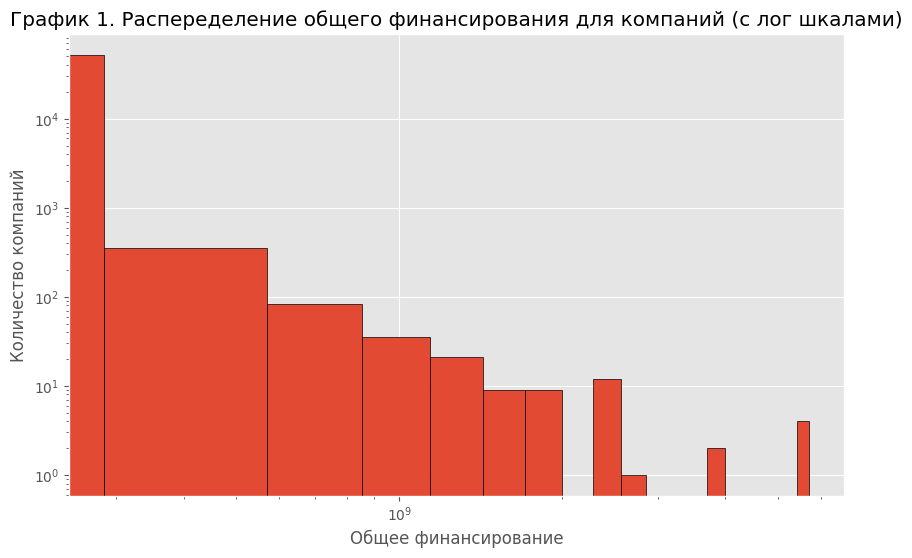

In [148]:
# вывожу гистограмму
plt.figure(figsize=(10, 6))
plt.hist(new_merged_dfs['funding_total'],  bins=20, edgecolor='black')
plt.title('График 1. Распеределение общего финансирования для компаний (с лог шкалами)')
plt.xlabel('Общее финансирование')
plt.ylabel('Количество компаний')
plt.xscale('log') 
plt.yscale('log')
plt.grid(True)
plt.show()



In [149]:
# отфильтрую нули в funding_total
without_nulls = new_merged_dfs[new_merged_dfs['funding_total'] > 0]
without_nulls.shape

(48413, 22)

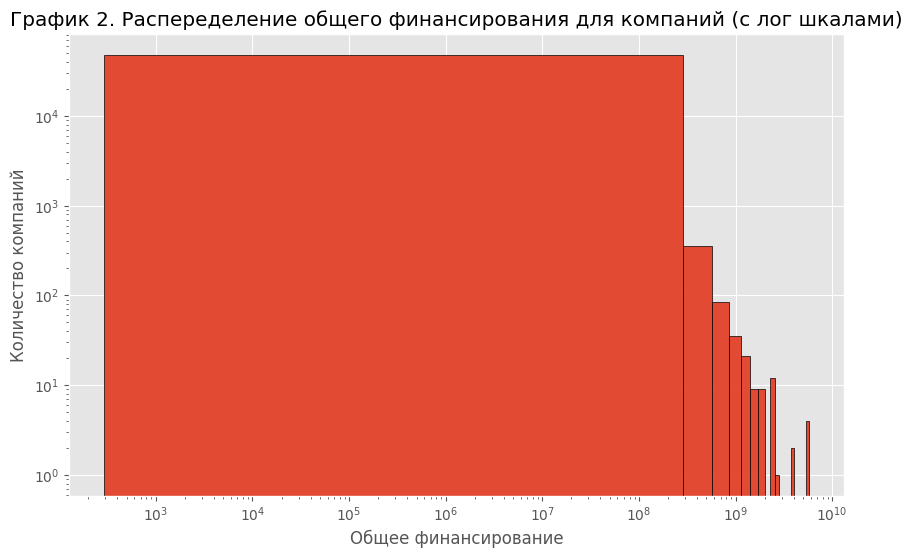

In [150]:
# вывожу гистограмму
plt.figure(figsize=(10, 6))
plt.hist(without_nulls['funding_total'], bins=20, edgecolor='black')
plt.title('График 2. Распеределение общего финансирования для компаний (с лог шкалами)')
plt.xlabel('Общее финансирование')
plt.ylabel('Количество компаний')
plt.xscale('log') 
plt.yscale('log')
plt.grid(True)
plt.show()

График 2 получился некрасивый. График 1 выглядит более опрятно.

In [151]:
# распределение значений по столбцу
without_nulls['funding_total'].describe()

count    4.841300e+04
mean     2.693499e+07
std      1.009526e+08
min      2.910000e+02
25%      1.060680e+06
50%      5.900000e+06
75%      2.353220e+07
max      5.700000e+09
Name: funding_total, dtype: float64

In [152]:
# вычисляю квартили, чтобы избавиться от выбросов
Q1 = without_nulls['funding_total'].quantile(0.25)
Q3 = without_nulls['funding_total'].quantile(0.75)
IQR = Q3 - Q1
Q1

np.float64(1060680.0)

In [153]:
Q3

np.float64(23532200.0)

In [154]:
IQR

np.float64(22471520.0)

In [155]:
# рассчитываю границы для выбросов 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [156]:
lower_bound

np.float64(-32646600.0)

In [157]:
upper_bound

np.float64(57239480.0)

In [158]:
# удаляю выбросы
without_nulls = without_nulls[(without_nulls['funding_total'] >= lower_bound) & 
                                (without_nulls['funding_total'] <= upper_bound)]

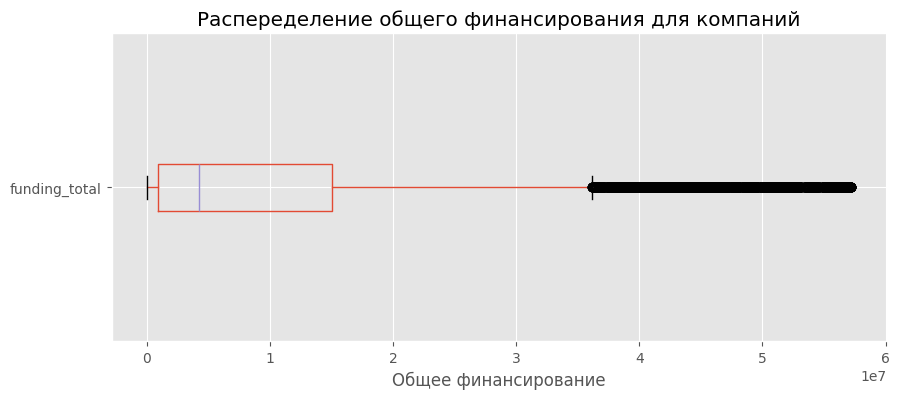

In [159]:
# выведу ящик с усами без нулевых значений в funding_total (дф without_nulls)

plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats
without_nulls.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распеределение общего финансирования для компаний')
plt.xlabel('Общее финансирование')

# Выводим график
plt.show()

**Вывод**: на боксплоте видно, что медиана смещена влево. Левый ус короче правого. В правой части данные имеют больше вариативности. Медиана расположена левее. Это говорит о том, что большая часть данных относится к левой стороне. Также видно, что медиана больше среднего значения почти в 2 раза и стандартное отклонение std велико (это говорит о большом разнообразии данных).

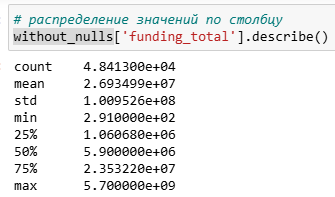

Какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся?

Типичный размер финансирования расположен в диапазоне от 25го до 50го процентилями. Даже, наверное, все что ближе к медиане и есть типичный размер финансирования. А выбивающийся размер финансирования - все что больше 75 процентиля. 


# 3.3. Куплены забесплатно? 

<a id="13"></a>

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [160]:
new_merged_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52626 entries, 0 to 133123
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id_1         52626 non-null  Int32         
 1   name_company         52626 non-null  object        
 2   category_code        51163 non-null  object        
 3   status               52626 non-null  object        
 4   founded_at           43196 non-null  datetime64[ns]
 5   closed_at            2943 non-null   datetime64[ns]
 6   domain               50785 non-null  object        
 7   network_username     34013 non-null  object        
 8   country_code         50182 non-null  object        
 9   investment_rounds    52626 non-null  Int32         
 10  funding_rounds       52626 non-null  Int32         
 11  funding_total        52626 non-null  float64       
 12  milestones           52626 non-null  float64       
 13  funding_round_id     52626 non-null

In [161]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_buy                9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [162]:
# использую дф without_nulls
# присоединяю without_nulls и acquisition_df

three_dfs = pd.merge(new_merged_dfs, acquisition_df, left_on='company_id_1', right_on='acquired_company_id', how='inner')

three_dfs.shape

(4955, 28)

In [163]:
# фильтрую данные по условию задачи
three_dfs_1 = three_dfs[(three_dfs['price_amount'] == 0) | 
                                (three_dfs['price_amount'] == 1) &
                     three_dfs['funding_total'] > 0]
three_dfs_1.shape

(3293, 28)

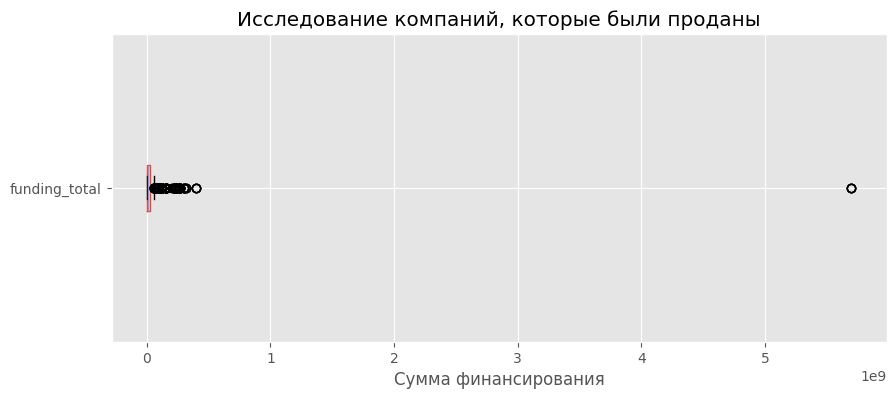

In [164]:
# выведу ящик с усами

plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats
three_dfs_1.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Исследование компаний, которые были проданы')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

На боксплоте видно, что финансирование распределено неравномерно для компаний, которые были проданы за 0 или 1$. Много выбросов.

In [165]:
# вычисляю квартили и IQR 
Q1 = three_dfs_1['funding_total'].quantile(0.25)
Q3 = three_dfs_1['funding_total'].quantile(0.75)
IQR = Q3 - Q1
Q1

np.float64(2000000.0)

In [166]:
Q3

np.float64(24030000.0)

In [167]:
IQR

np.float64(22030000.0)

In [168]:
# рассчитываю границы для выбросов 

lower_bound_1 = Q1 - 1.5 * IQR
upper_bound_1 = Q3 + 1.5 * IQR

In [169]:
# для каких процентилей соответствуют границы выбросов
lower_per = (three_dfs_1['funding_total'] < lower_bound_1).mean() * 100
upper_per = (three_dfs_1['funding_total'] > upper_bound_1).mean() * 100

In [170]:
# нижняя граница выбросов
lower_per

np.float64(0.0)

In [171]:
# верхняя граница выбросов
100 - upper_per

np.float64(92.86365016702095)

**Вывод**: нижняя граница выбросов = 0%, а верхняя = 97%. Нижняя граница (0й процентиль) равна минимальному значению.
Верхняя граница (97й процентиль) лучше учитывает распределение данных.


# 3.4. Цены стартапов по категориям 

<a id="14"></a>

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [172]:
three_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id_1          4955 non-null   Int32         
 1   name_company          4955 non-null   object        
 2   category_code         4825 non-null   object        
 3   status                4955 non-null   object        
 4   founded_at            4061 non-null   datetime64[ns]
 5   closed_at             52 non-null     datetime64[ns]
 6   domain                4785 non-null   object        
 7   network_username      2648 non-null   object        
 8   country_code          4750 non-null   object        
 9   investment_rounds     4955 non-null   Int32         
 10  funding_rounds        4955 non-null   Int32         
 11  funding_total         4955 non-null   float64       
 12  milestones            4955 non-null   float64       
 13  funding_round_id  

In [173]:
# фильтрую данные, без фильтрации в describe получались нули в min, 25%, 50%
three_dfs = three_dfs[three_dfs['price_amount'] > 0]
three_dfs.shape

(1662, 28)

In [174]:
display(three_dfs['price_amount'].describe())

count    1.662000e+03
mean     2.806224e+08
std      6.379961e+08
min      1.090000e+05
25%      3.000000e+07
50%      1.025000e+08
75%      3.000000e+08
max      8.500000e+09
Name: price_amount, dtype: float64

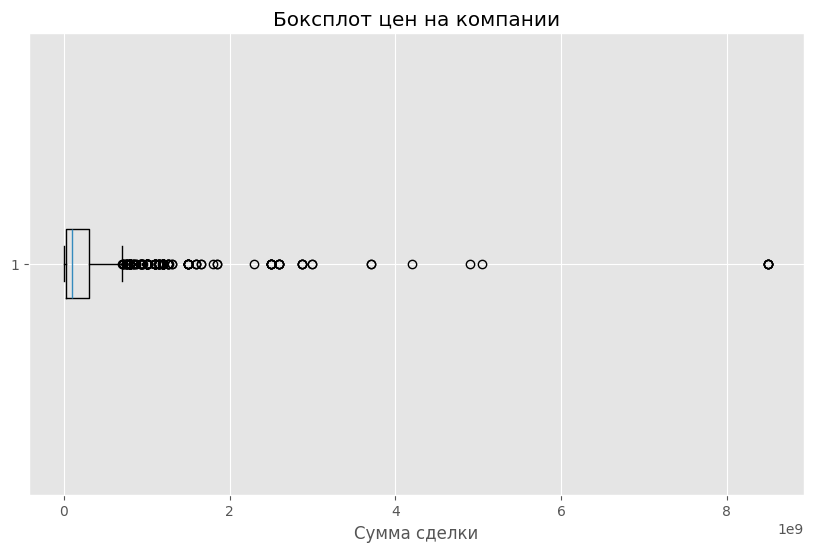

In [175]:
# выведу ящик с усами

plt.figure(figsize=(10, 6))
plt.boxplot(three_dfs['price_amount'], vert=False)
plt.title('Боксплот цен на компании')
plt.xlabel('Сумма сделки')
plt.grid(True)
plt.show()


На графике видно много выбросов. Медиана смещена влево. Большее кол-во значений сумм сделок относится к левой части. Есть крупные сделки в шкале от 2 до 5. Большое кол-во точек расположено в диапазоне от 0.1 до 1.

In [176]:
# уникальные значения в price_amount
# three_dfs['price_amount'].unique()

In [177]:
three_dfs['price_amount'].min()

np.int64(109000)

In [178]:
three_dfs['price_amount'].max()

np.int64(8500000000)

In [179]:
# (Cтарое решение - не работает)

bins = [0, 10000000, 100000000, 500000000, float('inf')]
labels = ['low', 'avg', 'norm', 'huge']

three_dfs['category_cut'] = pd.cut(three_dfs['price_amount'], bins, labels=labels)

little_df = three_dfs[['category_cut', 'price_amount', 'category_code']].sort_values(ascending=False, by='price_amount')
little_df

little_df.groupby('category_cut')['category_cut'].count()

C:\Users\cools\AppData\Local\Temp\ipykernel_7268\2620381853.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  little_df.groupby('category_cut')['category_cut'].count()


category_cut
low     174
avg     651
norm    627
huge    210
Name: category_cut, dtype: int64

In [180]:
# разброс значений

razbros_df = three_dfs.groupby('category_code').agg(median_price_amount=('price_amount', 'median'),
                                                    min_value=('price_amount', 'min'), 
                                                    max_value=('price_amount', 'max'),
                                                   ).reset_index()
razbros_df['minus'] = razbros_df['max_value'] - razbros_df['min_value']



In [181]:
bins = [0, 10000000, 100000000, 500000000, float('inf')]
labels = ['low', 'avg', 'norm', 'huge']

razbros_df['median_category'] = pd.cut(razbros_df['median_price_amount'], bins, labels=labels)
razbros_df.sort_values(ascending=False, by='max_value')

,category_code,median_price_amount,min_value,max_value,minus,median_category
30,software,7.365000e+07,258100,8500000000,8499741900,avg
11,games_video,1.170000e+08,270000,5040000000,5039730000,norm
28,semiconductor,1.230000e+08,8300000,4900000000,4891700000,norm
20,network_hosting,1.000000e+08,2000000,3000000000,2998000000,avg
24,public_relations,3.200000e+07,2000000,3000000000,2998000000,avg
3,biotech,2.850000e+08,109000,2300000000,2299891000,norm
33,web,7.440000e+07,575000,1850000000,1849425000,avg
0,advertising,8.000000e+07,1400000,1800000000,1798600000,avg
8,enterprise,1.670000e+08,5120000,1600000000,1594880000,norm
10,finance,1.700000e+08,1200000,1500000000,1498800000,norm


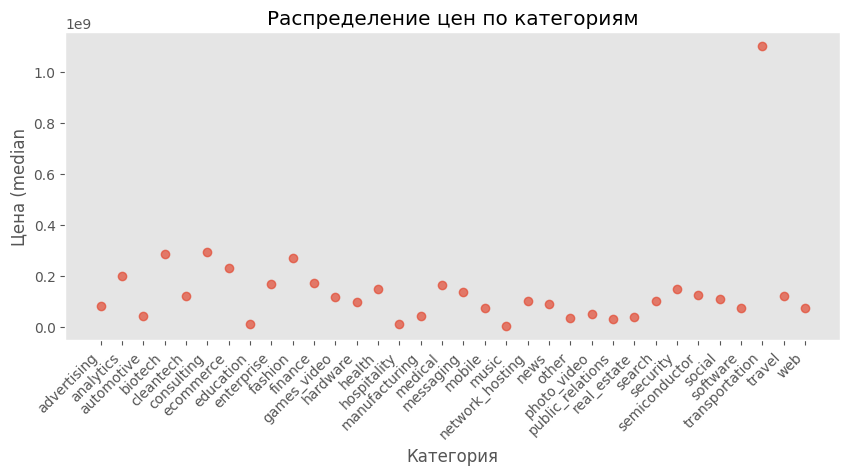

In [182]:
# строю диаграмму рассеяния для 'median_price_amount' и 'category_code'

# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(razbros_df['category_code'],
         razbros_df['median_price_amount'],
         marker='o', # Задаём стиль маркера
         linestyle='', # Делаем линии между точками невидимыми
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Распределение цен по категориям')
plt.xlabel('Категория')
plt.ylabel('Цена (median')
plt.xticks(rotation=45, ha='right')
plt.grid()


# Отображаем график
plt.show()

**Вывод**: при изучении уникальных значений в столбце price_amount решила разделить следующим образом:
        
* low до 10м
* avg от 10м до 100м
* norm от 100м до 500м
* huge от 500м +

От Дмитрия: Получается больше всего компаний попало в ценовой диапазон avg от 10м до 100м, но это не дает нам информации ни о наибольших типичных ценах по категориям

В таблице razbros_df для категорий компаний вывела список медиан сумм сделок (median_price_amount). Категоризировала столбец median_price_amount на группы 'huge', 'avg', 'norm', 'huge'. Huge встречается 1 раз, norm = 16 раз, avg = 14 раз, low = 3 раза. Всего 34 категорий области деятельности компаний:

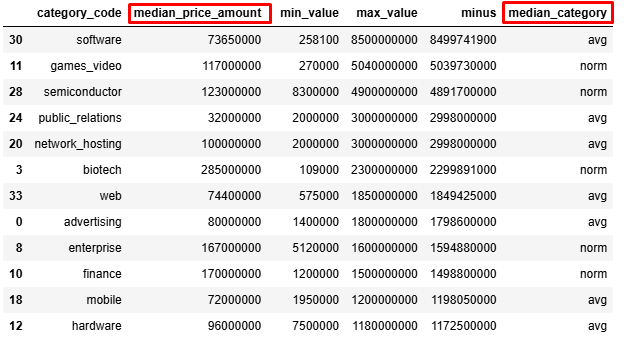

От Дмитрия: Тут важно рассмотреть как варьируются цены именно в пределах category_code.

Вывела график и выбрала топ 10 компаний для демонстрации с высокими максимальными значениями сумм сделок и максимальным разбросам данных (столбцы max_value и minus):

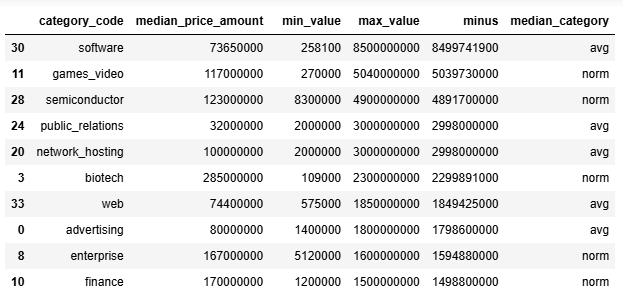

В топ-10 попали категории компаний: software, games_video, semiconductor, public_relations, network_hosting, biotech, web, advertising, enterprise, finance. Рекомендую заказчику обратить внимание на эти категории компаний.


# 3.5. Сколько раундов продержится стартап перед покупкой

<a id="15"></a>

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [183]:
new_merged_dfs['funding_rounds'].describe()

count     52626.0
mean     2.529738
std      1.908102
min           1.0
25%           1.0
50%           2.0
75%           3.0
max          15.0
Name: funding_rounds, dtype: Float64

Большинство стартапов имеют от 1 до 3 раундов финансирования. Медианное число раундов = 2.

In [184]:
# тут непонятно, вывела общеее число раундов для каждого статуса
new_merged_dfs.groupby('status')['funding_rounds'].count()

status
acquired      4918
closed        2890
ipo           1238
operating    43580
Name: funding_rounds, dtype: Int64

In [185]:
# тут уже понятней кол-во раундов для каждого статуса
oi_item = new_merged_dfs.groupby('status')['funding_rounds'].describe()
oi_item 

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4918.0,2.758438,1.785932,1.0,1.0,2.0,4.0,12.0
closed,2890.0,1.886505,1.341457,1.0,1.0,1.0,2.0,8.0
ipo,1238.0,4.471729,3.175099,1.0,2.0,4.0,6.0,13.0
operating,43580.0,2.491418,1.867977,1.0,1.0,2.0,3.0,15.0


In [186]:
# вывела столбцы, чтобы построить график
two_columns = oi_item.iloc[:, [1]]
two_columns_1 = two_columns.sort_values(ascending=False, by='mean')
two_columns_1

,mean
status,
ipo,4.471729
acquired,2.758438
operating,2.491418
closed,1.886505


<Axes: title={'center': 'Категории заведений, которые чаще являются сетевыми'}, xlabel='Статусы стартапов', ylabel='Медиана раундов'>

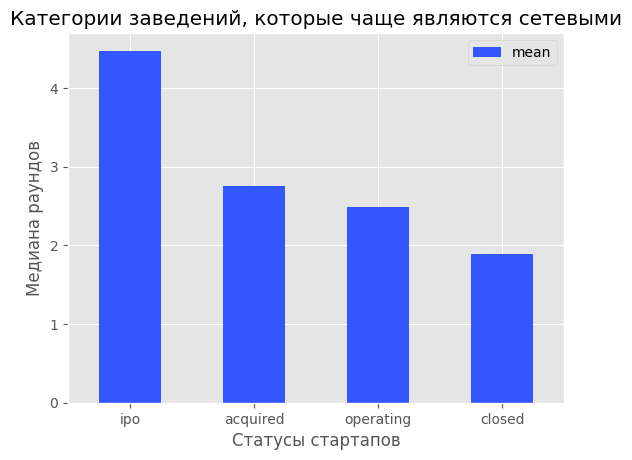

In [187]:
two_columns_1.plot(kind='bar',
      title='Категории заведений, которые чаще являются сетевыми',
      ylabel='Медиана раундов',
      xlabel='Статусы стартапов',
      color='#3357FF',
      rot=0
)

**Вывод:**

* ipo - для данного статуса типичное значение 4 раундов.
* acquired - для данного статуса типичное значение 2 раунда.
* operating - для данного статуса типичное значение 2 раунда.
* closed - для данного статуса типичное значение 1 раунда.



# Шаг 4. Итоговый вывод и рекомендации

<a id="16"></a>

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Ой, какой-то тяжелый проект. В каждом задании второй части я использовала очищенный объединенный дф из задания 3.1 (new_merged_dfs).

Что я сделала: предобработала данные, объединила датафреймы, удалила пропуски, привела столбцы к нужному типу данных, избавилась от выбросов в нескольких задачах.

Работала со следующими дф:

* acquisition_df
* company_and_rounds_df
* degrees_df
* education_df
* people_df
* fund_df
* investment_df

В целом данных много, но также много пропусков. этом может повлиять на исходный результат исследования.

Также в проекте есть проблемный датасет company_and_rounds_df. При изучении доли пропусков видно, что начиная от funding_round_id до is_last_round доля пропусков у столбцов практически одна и таже - 75%. А у столбцов от investment_rounds до milestones - одинаковая доля пропусков. 

Для удобства можно разделить датасет company_and_rounds_df на 2 части:
1. первая таблица будет со столбцами company_id_1 - milestones 
2. funding_round_id - is_last_round 

Далее объединила данные из двух обработанных дф company_df_empty и rounds_df_empty (из задания 2.4). Получила новый дф new_merged_dfs с количеством строк 52626. Дальше работала с дф new_merged_dfs. В данных много выбросов и большая вариация значений. Есть очень крупные суммы сделок и суммы финансирований. 

**Раунды финансирования по годам:**
Сводная таблица по годам, в которой на основании столбца raised_amount для каждого года указан типичный размер средств, выделяемый в рамках одного раунда и общее количество раундов финансирования за этот год:

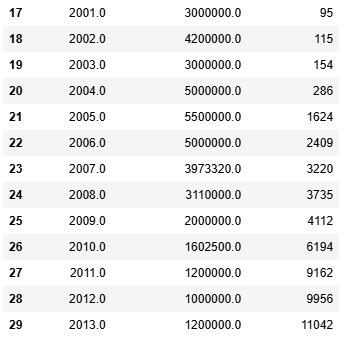

На таблице видно что с каждым годом количество раундов увеличивается, а сумма финансирования уменьшается.

**Люди и образование:**

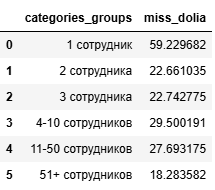

На таблице выше указаны категории компаний по кол-ву сотрудник и средняя доля в % по отсутствию информации об образовании. По таблице можно сделать вывод что чем больше сотрудников в кмпании, тем меньше доля об отсутствии информации об образовании и наоборот.

**Распределение цен по категориям компаний:**

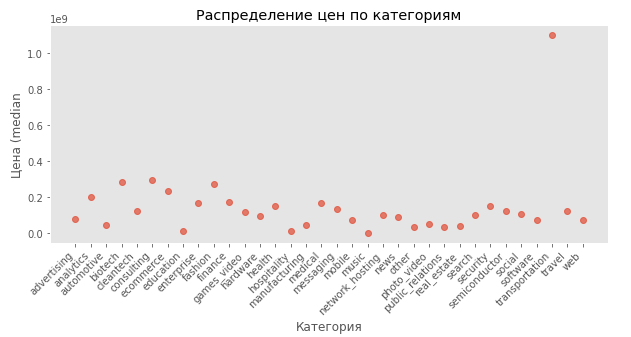

Компании делятся на 34 категории по столбцу cattegory_code. На графике представлено медиана сум компаний для каждой категории и как они распределяются.

На вопрос заказчика о типичном значении количества раундов для каждого возможного статуса стартапа можно ответить так:
* ipo - для данного статуса типичное значение 4 раунда.
* acquired - для данного статуса типичное значение 2 раунда.
* operating - для данного статуса типичное значение 2 раунда.
* closed - для данного статуса типичное значение 1 раунда.

# Содержание

[Введение](#1)<br>
[Шаг 1. Знакомство с данными: загрузка и первичная предобработка](#2)<br>
  [1.1. Вывод общей информации, исправление названия столбцов ](#3)<br>
  [1.2. Смена типов и анализ пропусков](#4)<br>
[Шаг 2. Предобработка данных, предварительное исследование](#5)<br>
  [2.1. Раунды финансирования по годам](#6)<br>
  [2.2. Люди и их образование](#7)<br>
  [2.3. Объединять или не объединять — вот в чём вопрос ](#8)<br>
  [2.4. Проблемный датасет и причина возникновения пропусков ](#9)<br>
[Шаг 3. Исследовательский анализ объединённых таблиц](#10)<br>
  [3.1. Объединение данных](#11)<br>
  [3.2. Анализ выбросов](#12)<br>
  [3.3. Куплены забесплатно?](#13)<br>
  [3.4. Цены стартапов по категориям ](#14)<br>
  [3.5. Сколько раундов продержится стартап перед покупкой](#15)<br>
[Шаг 4. Итоговый вывод и рекомендации](#16)<br>